In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

%run ../notebook-init.py

# load R libraries                                                                                    
%R invisible(library(ggplot2))
%R invisible(library(fastcluster))
%R invisible(library(reshape))
%R invisible(library(reshape2))
%R invisible(library(gplots))
%R invisible(library(RSQLite))

#set up ggplot2 defaults                                                                              
%R theme_set(theme_gray(base_size=18))

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)

Populating the interactive namespace from numpy and matplotlib


[1] 100


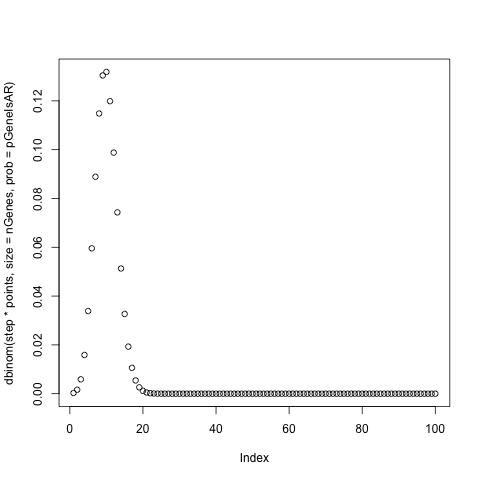

In [17]:
%%R

pGeneIsAR <- 1 / (10)
nGenes <- 100

step <- 1
points <- 1:100

plot(dbinom(step*points,size=nGenes,prob=pGeneIsAR))
nGenes



[1] 9.0e+08 1.1e+09
[1] 1e+17


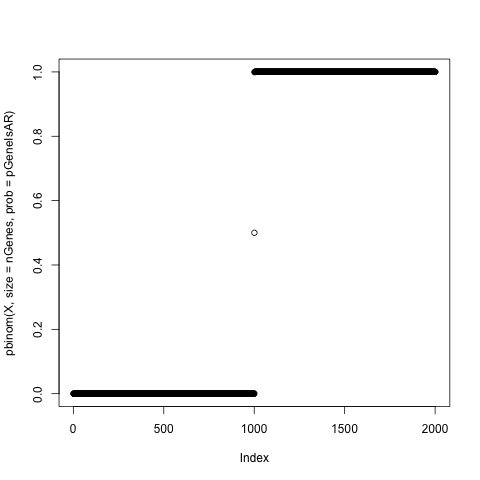

In [29]:
%%R

pGeneIsAR <- 1 / (100*1000*1000)
nGenes <- 100*(1000*1000*1000*1000)*1000

step <- 100*1000
start <- 900*1000*1000
end <- 1100*1000*1000
X <- seq(start,end,by=step)
print(range(X))
plot(pbinom(X,size=nGenes,prob=pGeneIsAR))
nGenes


In [58]:
import numpy as np
import pandas as pd
from glob import glob

sbres = glob('../shortbred/FMTchrons2/*results.txt')

tbls = {}
for fname in sbres:
    tbl = pd.read_table(fname,header=0,index_col=0)
    tblname = fname.split('/')[-1]
    tblname = tblname.split('.')[0]
    rep = tblname.split('-')[2]
    time = tblname.split('-')[1]
    if time.lower() == 'pre_fmt':
        time = 0
    elif '4' in time:
        time = 4
    elif '8' in time:
        time = 8
        
    if rep not in tbls:
        tbls[rep] = {}
    tbls[rep][time] = tbl[['Hits']]
    
    
subtbls={}

for rep, tblset in tbls.items():
        subtbls[rep] = pd.concat(tblset,axis=1)



pnl = pd.Panel(subtbls)

In [154]:

s = []
for i in pnl.major_axis:
    a = pnl.major_xs(i).values.flatten()
    assert len(a) == 18*3
    s.append(a)

pnl.major_xs(pnl.major_axis[0])

,,R1001,R1002,R1003,R1004,R1005,R1006,R1007,R1008,R1009,R1011,R1012,R1014,R1015,R1017,R1018,R1020,R1021,R1022
0,Hits,0,0,NaN,0,0,0,0,NaN,0.0,0,NaN,0,0,0,0,0.0,0,0
4,Hits,0,0,0.0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0,0
8,Hits,0,0,0.0,0,0,0,0,0.0,NaN,0,0.0,0,0,0,0,NaN,0,0


In [159]:
%%R -i s



print( apply(s,2,function(r){
    return( sum(r[!is.na(r)] > 0))
}))

  [1]  0  5  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  5  4  0  1  8 47  0  2
 [26]  0  0  5  1  1  0  0  0  0  2  0  0  2  0  0  3  0  4 10  4  2  1  0  2  2
 [51]  0  0  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0  1
 [76]  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  8  0  0  0  1  0
[101]  0  0  1 24  1  0  3  0  0  0  0  6  0 21 49 48  0  5 14 13  1  0 29  4  4
[126]  4  0  1 15 18  0  0  4  3  0  0  0  0  0  5  0 25  0  1  0  0  0  3  0  8
[151]  0  0  0  0  0  0  1  0  4  0  0  0  0  0  0  0  0  0  0  0  4  0 10  2  0
[176]  0  2  0  0  0  0  4  0  0  0  3 23 21  0 45  0  0  1  0  0  0 38  0  0  8
[201]  3 25  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  5  0  0
[226]  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
[251]  0  0  0  0 34  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0 10  0  1  0
[276]  0  0  0  0  0  2 25  4  0 13  0  0  0  0  0  1  0  0  0  0  3  1  0  0  0
[301]  1  6 31  0  0  1  0  

[1] 49
[1] 24
[1] 25
[1] 2 0 1 0 0 4
   k Freq        p         bin
1  0   25 2.50e-08 12.31851239
2  1   14 5.00e-08 13.19840651
3  2    3 7.50e-08  9.42743326
4  3    2 1.00e-07  5.05041056
5  4    1 1.25e-07  2.16446157
6  5    1 1.50e-07  0.77302193
7  7    1 1.75e-07  0.23663934
8 13    1 2.00e-07  0.06338553
9 25    1 2.25e-07  0.01509179


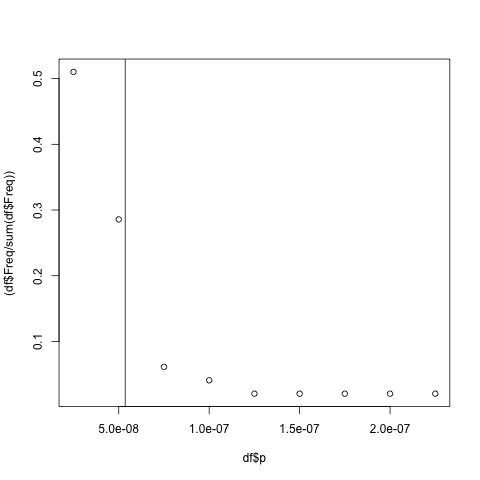

In [184]:
%%R -i s



# print( apply(s,1,function(r){
#     return( sum(r > 0))
# }))


k <- s[,104]
k <- k[!is.na(k)]
print(length(k))
print(sum(k > 0))
print(sum(k == 0))
print(head(k))
# print(max(k))
#k <- k[k<100]
# print(length(hinfo$breaks))
# print(table(k))
t <- table(k)
# print(as.numeric(names(t)))
df <- data.frame(t)


N <- 40*1000*1000
df <- df
df$p <- as.numeric(df$k) / N
df$bin <- sum(df$Freq) * dbinom(as.numeric(df$k),N, weighted.mean(df$p,df$Freq))


plot(df$p,(df$Freq/sum(df$Freq)))
abline(v=weighted.mean(df$p,df$Freq))
df

In [191]:
%%R 

library(VGAM)

Y <- (df$Freq / sum(df$Freq))
X <- df$p

fit <- vglm( cbind(df$Freq,df$k) ~ 1, betabinomial, trace=TRUE)

Coef(fit)



VGLM    linear loop  1 :  loglikelihood = -20.65642
VGLM    linear loop  2 :  loglikelihood = -20.62355
VGLM    linear loop  3 :  loglikelihood = -20.61746
VGLM    linear loop  4 :  loglikelihood = -20.6155
VGLM    linear loop  5 :  loglikelihood = -20.61502
VGLM    linear loop  6 :  loglikelihood = -20.61488
VGLM    linear loop  7 :  loglikelihood = -20.61484
VGLM    linear loop  8 :  loglikelihood = -20.61483
VGLM    linear loop  9 :  loglikelihood = -20.61483
VGLM    linear loop  10 :  loglikelihood = -20.61483
VGLM    linear loop  11 :  loglikelihood = -20.61483
       mu       rho 
0.4195435 0.3470238 


In [193]:
%%R

library(VGAM)
 
successes <- print(rep(df$k,df$Freq))
trials <- rep(N,length(successes))
fit <- vglm( cbind(trials,successes) ~ 1, betabinomial, trace=TRUE)

Coef(fit)




 [1] 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
[26] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  3  3  4  5  7  13 25
Levels: 0 1 2 3 4 5 7 13 25
VGLM    linear loop  1 :  loglikelihood = -31123.023
VGLM    linear loop  2 :  loglikelihood = -21148.922
VGLM    linear loop  3 :  loglikelihood = -20244787390
Taking a modified step....................
       mu       rho 
0.9999889 0.0000000 
